#### # Importando Módulos

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd

### Parte I: Definindo as Fórmulas para Cálculos 

In [117]:
# fórmula para estimar custo de estoque em trânsito

# ET = i (C . Q ) dias/365

# ET = estoque em trânsito;
# i = custo de manutenção de estoques como percentual do valor médio disponível no ano;
# C = custo de um item;
# Q = quantidade de itens movimentados anualmente;
# dias = quantidade de dias em que a carga permanece em trânsito.

In [118]:
# fórmula para estimar custo de frete

# Frete = Clb (Q * P)

# Clb = custo por libra(peso);
# Q = quantidade de itens movimentados anualmente;
# P = peso de cada item em lb.

In [119]:
# fórmula para calcular valor agregrado pelo transporte (valos dos itens + valor do frete)

# Valor_Agregado = Q * (C + P * Clb)

# Q = quantidade de itens movimentados anualmente;
# C = custo de um item;
# Clb = custo por libra(peso);
# P = peso de cada item em libra.

In [120]:
# fórmula para calcular quantidade de viagens ao ano

# Qv = (Q * P) / Qm

# P = peso de cada item em libra.
# Q = quantidade de itens movimentados anualmente;
# Qm = quantidade mínima de transporte em libras por viagem.

In [121]:
# fórmula para calcular custo de manutenção de estoque 

# Manutencao_Estoque = i * (Valor_Agregado/(Qv * 2))

# i = custo de manutenção de estoques como percentual do valor médio disponível no ano;
# Qv = quantidade de viagens ao ano.

### Parte II: Importando e entendendo base de dados  

In [122]:
cotacao = pd.read_csv('dados/cotacao.csv')
cotacao

,Modal,Custo/Libra (R$),Quantia Mínima Aceito (Libra),Tempo (dias)
0,Marítmo,"0,03",100000,30
1,Ferroviário,"0,05",80000,10
2,Rodoviário,"0,09",40000,7
3,Aéreo,"0,15",10000,2


In [123]:
mercadoria = pd.read_csv('dados/mercadoria.csv')
mercadoria

,Custo Manutenção Estoque (%),Valor da Mercadoria (R$),Quantidade/ Mês (EA),Período (meses),Peso Mercadoria (Libra)
0,0.25,200,1000,12,175


In [124]:
cotacao.dtypes

Modal                            object
Custo/Libra (R$)                 object
Quantia Mínima Aceito (Libra)     int64
Tempo (dias)                      int64
dtype: object

In [125]:
mercadoria.dtypes

Custo Manutenção Estoque (%)    float64
Valor da Mercadoria (R$)          int64
Quantidade/ Mês (EA)              int64
Período (meses)                   int64
Peso Mercadoria (Libra)           int64
dtype: object

In [126]:
cotacao['Custo/Libra (R$)'] = cotacao['Custo/Libra (R$)'].str.replace(',', '.').astype(float)

### Parte III: Criando Função para Cálculo de Armazenagem e Frete

In [127]:
def calculo_logistico_anual(i, C, Q, Clb, P, Qm, dias):
    ET = i * (C * Q) * dias/365
    Frete = Clb * (Q * P)
    Valor_Agregado = Q * (C + P * Clb)
    Qv = (Q * P) / Qm
    Manutencao_Estoque = i * (Valor_Agregado/(Qv * 2))
    Armazenagem = ET + Manutencao_Estoque
    
    return np.array([Armazenagem, Frete])

### Parte IV: Calculando Valores por Modal

#### # Determinando variáveis universais

In [128]:
i = mercadoria['Custo Manutenção Estoque (%)'][0]
C = mercadoria['Valor da Mercadoria (R$)'][0]
Q = mercadoria['Quantidade/ Mês (EA)'][0] * mercadoria['Período (meses)'][0]
P = mercadoria['Peso Mercadoria (Libra)'][0]

#### # Calculando valores por modais 

In [129]:
Clb = cotacao['Custo/Libra (R$)'][0]
Qm = cotacao['Quantia Mínima Aceito (Libra)'][0]
dias = cotacao['Tempo (dias)'][0]

modal_marítmo = calculo_logistico_anual(0.25, 200, 12000, 0.03, 175, 100000, 30)
modal_marítmo

array([63975.78277886, 63000.        ])

In [130]:
Clb = cotacao['Custo/Libra (R$)'][1]
Qm = cotacao['Quantia Mínima Aceito (Libra)'][1]
dias = cotacao['Tempo (dias)'][1]

modal_ferroviário = calculo_logistico_anual(0.25, 200, 12000, 0.05, 175, 80000, 10)
modal_ferroviário

array([ 28366.92759295, 105000.        ])

In [131]:
Clb = cotacao['Custo/Libra (R$)'][2]
Qm = cotacao['Quantia Mínima Aceito (Libra)'][2]
dias = cotacao['Tempo (dias)'][2]

modal_rodoviário = calculo_logistico_anual(0.25, 200, 12000, 0.09, 175, 40000, 7)
modal_rodoviário

array([ 17671.13502935, 189000.        ])

In [132]:
Clb = cotacao['Custo/Libra (R$)'][3]
Qm = cotacao['Quantia Mínima Aceito (Libra)'][3]
dias = cotacao['Tempo (dias)'][3]

modal_aéreo = calculo_logistico_anual(0.25, 200, 12000, 0.15, 175, 10000, 2)
modal_aéreo

array([  4903.74266145, 315000.        ])

### Parte V: Plotando Custos para encontrar Ponto Ótimo  

#### # Criando e normalizando arrays unificados por custos

In [133]:
custos_frete = np.array([modal_marítmo[1], modal_ferroviário[1], modal_rodoviário[1], modal_aéreo[1]])
custos_frete

array([ 63000., 105000., 189000., 315000.])

In [134]:
custos_armazenagem = np.array([modal_marítmo[0], modal_ferroviário[0], modal_rodoviário[0], modal_aéreo[0]])
custos_armazenagem

array([63975.78277886, 28366.92759295, 17671.13502935,  4903.74266145])

In [135]:
total_maritmo = modal_marítmo[0] + modal_marítmo[1]
total_ferroviario = modal_ferroviário[0] + modal_ferroviário[1]
total_rodoviario = modal_rodoviário[0] + modal_rodoviário[1]
total_aereo = modal_aéreo[0] + modal_aéreo[1]
custos_totais = [total_maritmo, total_ferroviario, total_rodoviario, total_aereo]

In [136]:
custos_frete_normalizado = (custos_frete - custos_frete.min()) / (custos_frete.max() - custos_frete.min())
custos_armazenagem_normalizado = (custos_armazenagem - custos_armazenagem.min()) / (custos_armazenagem.max() - custos_armazenagem.min())

#### # Plotando gráfico com trade off dos valores de frete vs armazengam para encontrar o ponto ótimo

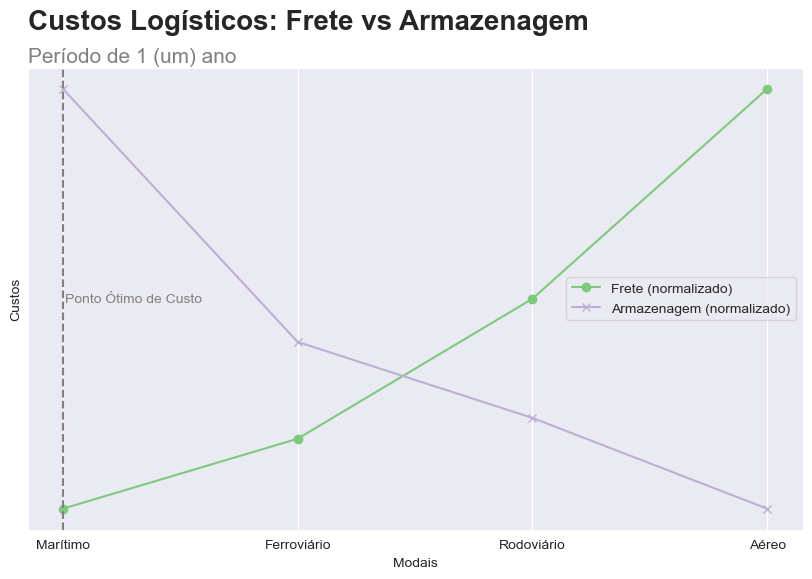

Modal com Menor Custo Total: Marítimo
Custo Total: 126975.78


In [137]:
indices = np.array([0, 1, 2, 3])
modais = ['Marítimo', 'Ferroviário', 'Rodoviário', 'Aéreo']

# Calcula o custo total (frete + armazenagem) para cada modal
custos_totais = custos_frete + custos_armazenagem

# Encontra o índice do modal com menor custo total
optimal_index = np.argmin(custos_totais)

# Estilizando o gráfico
sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6)) 

# Plot dos dados normalizados
plt.plot(indices, custos_frete_normalizado, marker='o', label='Frete (normalizado)')
plt.plot(indices, custos_armazenagem_normalizado, marker='x', label='Armazenagem (normalizado)')

plt.xlabel('Modais')
plt.ylabel('Custos')
plt.title('Custos Logísticos: Frete vs Armazenagem' + '\n', fontsize=20, loc='left', weight='bold')
plt.suptitle('Período de 1 (um) ano', fontsize=15, y=0.915, x=0.23, color='Grey')

plt.yticks([])
plt.xticks(indices, modais)
plt.legend()

# Linha vertical no ponto ótimo com legenda horizontal
plt.axvline(x=optimal_index, color='gray', linestyle='--')
plt.text(optimal_index + 0.3, 0.5, 'Ponto Ótimo de Custo', rotation=0, color='gray', ha='center', va='center')

plt.show()

print("Modal com Menor Custo Total:", modais[optimal_index])
print("Custo Total: {:.2f}".format(custos_totais[optimal_index]))

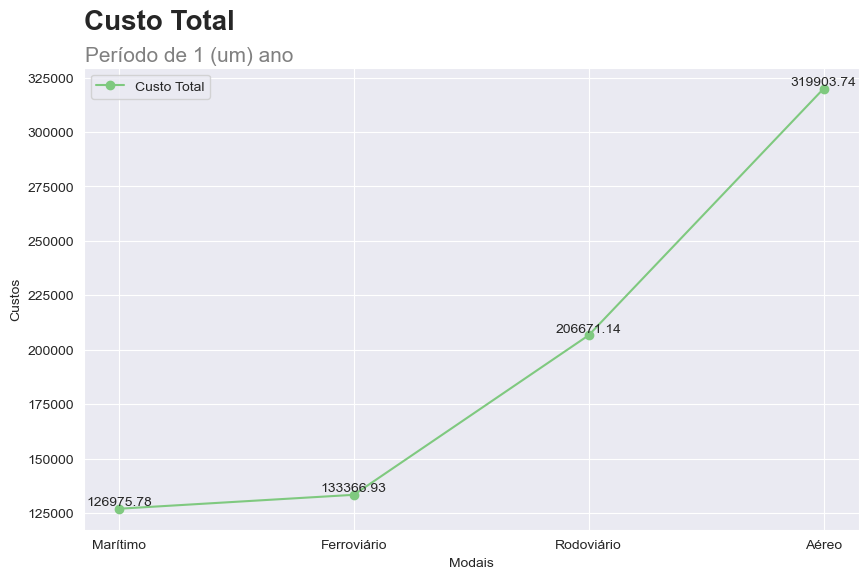

In [138]:
# Supondo que você já tenha definido as variáveis custos_frete e custos_armazenagem
custo_total = (custos_frete + custos_armazenagem)

indices = np.array([0, 1, 2, 3])
modais = ['Marítimo', 'Ferroviário', 'Rodoviário', 'Aéreo']

sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6)) 

# Plot dos dados
plt.plot(indices, custo_total, marker='o', linestyle='-', label='Custo Total')

# Adicionando rótulos de valor nos pontos do gráfico
for i, valor in enumerate(custo_total):
    plt.text(indices[i], valor, f'{valor:.2f}', ha='center', va='bottom', size='10')

plt.xlabel('Modais')
plt.ylabel('Custos')
plt.title('Custo Total' + '\n', fontsize=20, loc='left', weight='bold')
plt.suptitle('Período de 1 (um) ano', fontsize=15, y=0.915, x=0.23, color='Grey')

plt.xticks(indices, modais)
plt.legend()

plt.show()